In [29]:
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xlrd

import matplotlib.pyplot as plt
import csv
import matplotlib.pyplot as plt 
#from nolearn.dbn import DBN
#import timei

In [30]:
from sklearn import *

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [195]:
#kdd_data=pd.read_csv('C:/Users/srish/Downloads/Compressed/kddcup.data_10_percent_corrected.csv',header=None)
#kdd_data.transpose()
#kdd_data1=pd.read_csv('C:/Users/srish/Downloads/Compressed/kddcup.data_10_percent_corrected.csv',header=None)
#kdd_data2=pd.read_csv('C:/Users/srish/Downloads/Compressed/kddcup.data_10_percent_corrected.csv',header=None)

In [136]:
kdd_header=pd.read_csv('Field Names.csv',header=None)
kdd_header
col_name=kdd_header.iloc[:,0:1]
#kdd_data.columns=col_name[0:]
col_name

,0
0,duration
1,protocol_type
2,service
3,flag
4,src_bytes
5,dst_bytes
6,land
7,wrong_fragment
8,urgent
9,hot


In [137]:
#kdd_header.append([[41,'Type','Symbolic']])
kdd_header.drop(kdd_header.columns[1],axis=1,inplace=True)

In [138]:
kdd_header.append(['type'])
kdd_header

,0
0,duration
1,protocol_type
2,service
3,flag
4,src_bytes
5,dst_bytes
6,land
7,wrong_fragment
8,urgent
9,hot


In [139]:
kdd_data1.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [140]:
res=kdd_data1.duplicated(subset=None,keep='first')
print(res.equals(True))

False


NO Duplicates 

In [141]:
def num_missing(x): 
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(kdd_data1.apply(num_missing, axis=0)) #

Missing values per column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64


In [142]:
print("Total rows ",len(kdd_data1))

Total rows  494021


In [143]:
kdd_data1[41].value_counts() # types of attacks

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: 41, dtype: int64

In [197]:
cols=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
                     'hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations',
                     'lnum_shells','lnum_access_files','lnum_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                     'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                     'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label']
kdd_data2.columns=cols
kdd_data2.loc[kdd_data2.label!="normal.","label"]="attack"

In [146]:
kdd_data1.label.value_counts()

attack     396743
normal.     97278
Name: label, dtype: int64

In [54]:
array=kdd_data.values
x=array[:,0:41]
y=array[:,41]

In [43]:
#Cross validation
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    ## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

In [198]:
kdd_data2.loc[kdd_data2.label!="normal.","label"]=1
kdd_data2.loc[kdd_data2.label=="normal.","label"]=0
print(kdd_data1.label.value_counts())

1    396743
0     97278
Name: label, dtype: int64


In [199]:
cleanup_nums = {"protocol_type":     {"tcp": 1, "icmp": 2, "udp": 3},
                "service": {"vmnet": 1, "smtp": 2, "ntp_u":3, "shell":4, "kshell":5, "aol":6, "imap4":7, "urh_i":8, "netbios_ssn":9,
                           "tftp_u":10, "mtp":11, "uucp":12, "nnsp":13, "echo":14, "tim_i":15, "ssh":16, "iso_tsap":17, "time":18,
                           "netbios_ns":19,"systat":20, "hostnames":21, "login":22, "efs":23, "supdup":24, "http_8001":25, "courier":26,
                           "ctf":27,"finger":28,"nntp":29,"ftp_data":30,"red_i":31,"ldap":32,"http":33,"ftp":34,"pm_dump":35,"exec":36,
                           "klogin":37,"auth":38,"netbios_dgm":39,"other":40,"link":41,"X11":42,"discard":43,"private":44,"remote_job":45,
                           "IRC":46,"daytime":47,"pop_3":48,"pop_2":49,"gopher":50,"sunrpc":51,"name":52,"rje":53,"domain":54,"uucp_path":55,
                           "http_2784":56,"Z39_50":57,"domain_u":58,"csnet_ns":59,"whois":60,"eco_i":61,"bgp":62,"sql_net":63,"printer":64,
                           "telnet":65,"ecr_i":66,"urp_i":67,"netstat":68,"http_443":69,"harvest":70},
               "flag":{"RSTR":1,"S3":2,"SF":3,"RSTO":4,"SH":5,"OTH":6,"S2":7,"RSTOS0":8,"S1":9,"S0":10,"REJ":11}}
#Replacing the encoded data in the dataset
kdd_data2.replace(cleanup_nums, inplace=True)
kdd_data2.head()
kdd_data2.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
protocol_type,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
service,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,...,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00
flag,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
src_bytes,181.00,239.00,235.00,219.00,217.00,217.00,212.00,159.00,210.00,212.00,...,308.00,291.00,289.00,306.00,289.00,310.00,282.00,203.00,291.00,219.00
dst_bytes,5450.00,486.00,1337.00,1337.00,2032.00,2032.00,1940.00,4087.00,151.00,786.00,...,662.00,1862.00,244.00,662.00,1862.00,1881.00,2286.00,1200.00,1200.00,1234.00
land,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [200]:
kdd_data2[['label']] = kdd_data2[['label']].apply(pd.to_numeric)
kdd_data2.label.value_counts()

1    396743
0     97278
Name: label, dtype: int64

In [55]:
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

------------------------------------------
Accuracy =  92.38767399650489  %
[[ 28966    226]
 [ 11056 107959]]
             precision    recall  f1-score   support

        0.0       0.72      0.99      0.84     29192
        1.0       1.00      0.91      0.95    119015

avg / total       0.94      0.92      0.93    148207



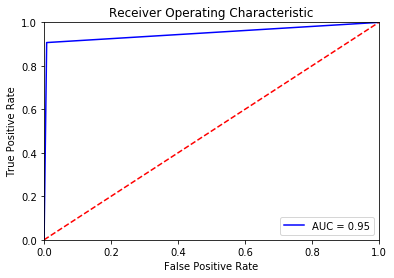

In [83]:
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
corr_coeff=kdd_data.corr()
print(corr_coeff)

                             duration  protocol_type   service      flag  \
duration                     1.000000       0.128283 -0.060167 -0.040977   
protocol_type                0.128283       1.000000  0.716901 -0.645043   
service                     -0.060167       0.716901  1.000000 -0.399591   
flag                        -0.040977      -0.645043 -0.399591  1.000000   
src_bytes                    0.004258      -0.002636 -0.003732 -0.001213   
dst_bytes                    0.005440      -0.030718 -0.029760 -0.014124   
land                        -0.000452      -0.007895 -0.010658  0.011640   
wrong_fragment              -0.003235       0.108531 -0.026102 -0.026019   
urgent                       0.003786      -0.003042 -0.001276 -0.001402   
hot                          0.013213      -0.052214 -0.058147 -0.024161   
num_failed_logins            0.005239      -0.011573  0.006632 -0.003841   
logged_in                   -0.017265      -0.493552 -0.686165 -0.227067   
lnum_comprom

In [66]:
label_cor_coef=corr_coeff.label
label_index=label_cor_coef.index

In [86]:
to_be_removed=[]
for i in range(0,len(label_cor_coef)):
    if abs(label_cor_coef[i]*100)<1 :
        to_be_removed.append(label_index[i])
print("number of Attributes to be removed :",len(to_be_removed))    
print("they are", to_be_removed)

number of Attributes to be removed : 12
they are ['src_bytes', 'land', 'urgent', 'hot', 'num_failed_logins', 'lnum_compromised', 'lroot_shell', 'lsu_attempted', 'rerror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [112]:
kdd_data_modified1=kdd_data
#for i in range(0,len(to_be_removed)):
   # kdd_data_modified1.drop(to_be_removed[i],axis=1,inplace=True)
    
kdd_data_modified1.head()

,duration,protocol_type,service,flag,dst_bytes,wrong_fragment,logged_in,lnum_root,lnum_file_creations,lnum_shells,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,label
0,0,1,33,3,5450,0,1,0,0,0,...,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0
1,0,1,33,3,486,0,1,0,0,0,...,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0
2,0,1,33,3,1337,0,1,0,0,0,...,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0
3,0,1,33,3,1337,0,1,0,0,0,...,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0
4,0,1,33,3,2032,0,1,0,0,0,...,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0


In [116]:
from sklearn.cross_validation import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = kdd_data_modified1.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Print the shape of sample set.
sampleset['label'].value_counts()

1    99407
0    24098
Name: label, dtype: int64

In [211]:
array=kdd_data_modified1.values
x=array[:,0:30]
y=array[:,29]

In [214]:
#Cross validation
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

In [213]:
#Array for storing classifier Models and their respective scores
models=[]
scores=[]

------------------------------------------
Accuracy =  98.22815386587678  %
[[ 28540    652]
 [  1974 117041]]
             precision    recall  f1-score   support

        0.0       0.94      0.98      0.96     29192
        1.0       0.99      0.98      0.99    119015

avg / total       0.98      0.98      0.98    148207



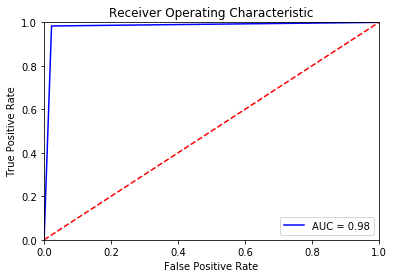

In [177]:
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
important_ftrs=model.feature_importances_
# display the relative importance of each attribute
print((important_ftrs))

[6.16017866e-04 2.50537637e-02 1.08204914e-01 1.57350885e-02
 1.06625234e-02 1.31398738e-03 2.39412302e-06 6.80029302e-03
 1.51776581e-05 1.24580154e-02 2.70210068e-04 1.84124818e-01
 2.31366947e-03 1.07573849e-04 3.59970542e-06 6.93501530e-05
 4.77453808e-05 1.07980435e-05 2.87616032e-05 0.00000000e+00
 0.00000000e+00 7.37632882e-04 2.40878414e-01 1.25165832e-01
 1.18475702e-02 1.32590726e-02 9.49013833e-04 1.70993315e-02
 1.18350812e-01 5.39449250e-04 6.44075835e-03 1.12538071e-02
 1.87842898e-02 1.51355346e-02 6.80775740e-03 1.13369504e-02
 1.31279599e-02 6.47379680e-03 8.44480670e-04 1.06922707e-02
 2.43656444e-03]


In [192]:
to_be_removed1=[]
for i in range(0,len(important_ftrs)-1):
    if 100*important_ftrs[i]<1 :
        to_be_removed1.append(label_index[i])

print("Number of attributes to be removed",len(to_be_removed1))
print("They are \n ",to_be_removed1)

Number of attributes to be removed 22
They are 
  ['duration', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'lnum_compromised', 'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login', 'is_guest_login', 'rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']


In [209]:
kdd_data_modified2=kdd_data2
for i in range(0,len(to_be_removed1)):
    print(to_be_removed1[i]," Dropped ")
    kdd_data_modified2.drop(to_be_removed1[i],axis=1,inplace=True)
    
kdd_data_modified2.head()

,protocol_type,service,flag,src_bytes,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,srv_rerror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,1,33,3,181,0,1,8,8,0.0,0.0,0.0,1.0,9,9,1.0,0.11,0.0,0.0,0.0,0
1,1,33,3,239,0,1,8,8,0.0,0.0,0.0,1.0,19,19,1.0,0.05,0.0,0.0,0.0,0
2,1,33,3,235,0,1,8,8,0.0,0.0,0.0,1.0,29,29,1.0,0.03,0.0,0.0,0.0,0
3,1,33,3,219,0,1,6,6,0.0,0.0,0.0,1.0,39,39,1.0,0.03,0.0,0.0,0.0,0
4,1,33,3,217,0,1,6,6,0.0,0.0,0.0,1.0,49,49,1.0,0.02,0.0,0.0,0.0,0


In [202]:
from sklearn.cross_validation import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = kdd_data_modified2.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Print the shape of sample set.
sampleset['label'].value_counts()

1    99407
0    24098
Name: label, dtype: int64

In [205]:
array=kdd_data_modified2.values
x=array[:,0:20]
y=array[:,19]

In [206]:
#Cross validation
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

In [207]:
#Array for storing classifier Models and their respective scores
models=[]
scores=[]
labels_train

array([1., 0., 1., ..., 1., 0., 1.])

------------------------------------------
Accuracy =  89.48025396911076  %
[[ 29011    181]
 [ 15410 103605]]
             precision    recall  f1-score   support

        0.0       0.65      0.99      0.79     29192
        1.0       1.00      0.87      0.93    119015

avg / total       0.93      0.89      0.90    148207



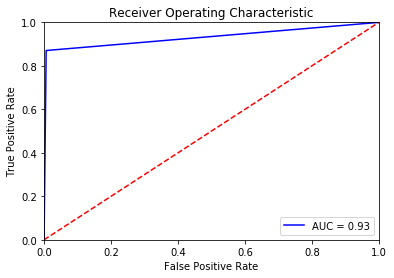

In [208]:
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()